In [1]:
import yfinance as yf
import datetime

def download_btc_data(start = '2010-01-01', end = '2025-07-01'):
    btc_data = yf.download('BTC-USD', start=start, end=end)
    btc_data['Days'] = (btc_data.index - datetime.datetime(2009, 1, 3)).days
    return btc_data

In [2]:
dbtc = download_btc_data()

/tmp/ipykernel_8451/2471509951.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc_data = yf.download('BTC-USD', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [3]:
dbtc.head()

Price,Close,High,Low,Open,Volume,Days
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
Date,,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800,2083
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200,2084
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700,2085
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600,2086
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100,2087


In [4]:
import numpy as np

# Ensure you're modifying the original DataFrame and not a view
dbtc = dbtc.copy()

# Add the log10 of the 'Close' column as a new column
dbtc["days_log"] = np.log10(dbtc["Days"])
dbtc["closing_price_log"] = np.log10(dbtc["Close"])

# Display the updated DataFrame
dbtc.head()

Price,Close,High,Low,Open,Volume,Days,days_log,closing_price_log
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,
Date,,,,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800,2083,3.318689,2.660234
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200,2084,3.318898,2.627816
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700,2085,3.319106,2.596373
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600,2086,3.319314,2.611621
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100,2087,3.319522,2.600778


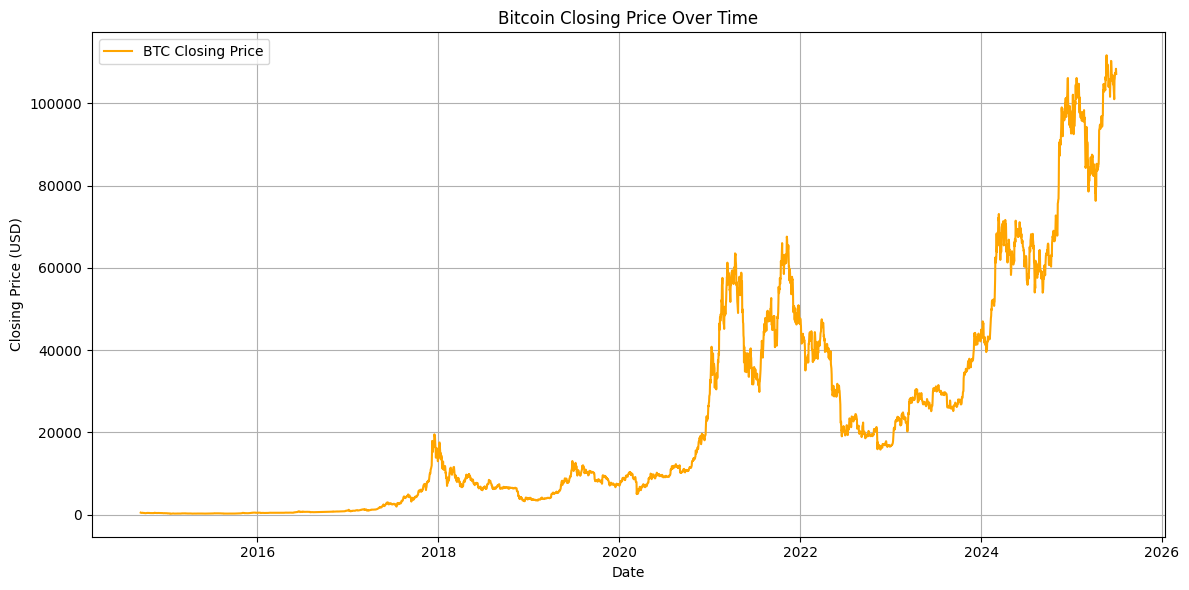

In [5]:
import matplotlib.pyplot as plt

# Assuming 'Date' is the index and 'Close' is the column with closing prices
plt.figure(figsize=(12, 6))
plt.plot(dbtc.index, dbtc['Close'], label='BTC Closing Price', color='orange')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


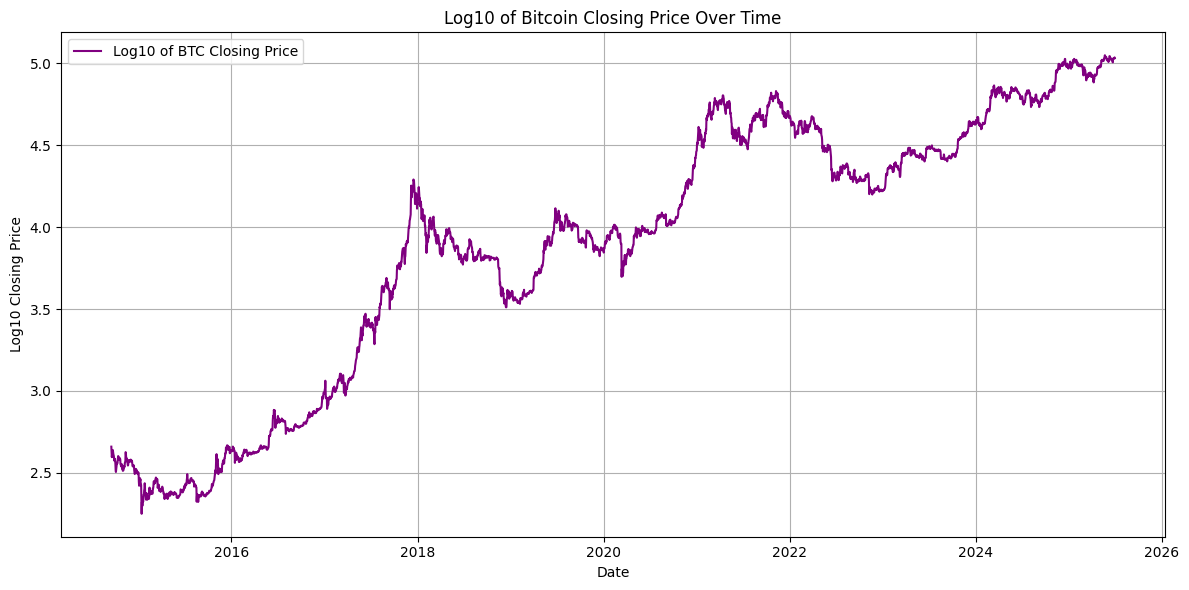

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(dbtc.index, dbtc["closing_price_log"], color='purple', label='Log10 of BTC Closing Price')
plt.title('Log10 of Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Log10 Closing Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


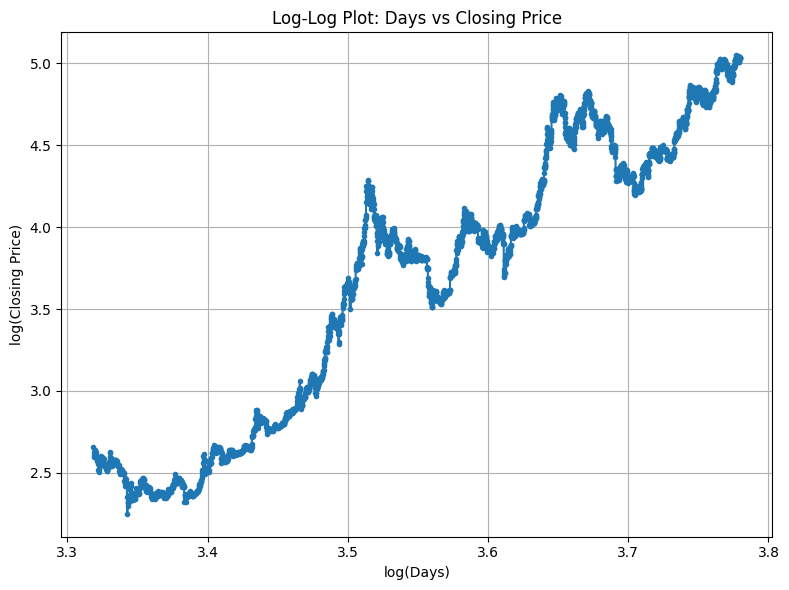

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(dbtc['days_log'], dbtc['closing_price_log'], marker='o', linestyle='-', markersize=3)
plt.xlabel('log(Days)')
plt.ylabel('log(Closing Price)')
plt.title('Log-Log Plot: Days vs Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Extract x and y
X = dbtc[['days_log']]  # 2D array for scikit-learn
y = dbtc['closing_price_log']  # 1D array

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope (β1): {slope:.4f}")
print(f"Intercept (β0): {intercept:.4f}")
print(f"R-squared: {model.score(X, y):.4f}")


Slope (β1): 5.9932
Intercept (β0): -17.6282
R-squared: 0.9137


In [9]:
import statsmodels.api as sm
import numpy as np

# Extract x and y
X = dbtc['days_log']
y = dbtc['closing_price_log']

# Add constant for intercept
X = sm.add_constant(X)  # Adds intercept term β0

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print summary for full statistical analysis
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      closing_price_log   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 4.167e+04
Date:                Fri, 11 Jul 2025   Prob (F-statistic):               0.00
Time:                        11:15:28   Log-Likelihood:                 55.640
No. Observations:                3940   AIC:                            -107.3
Df Residuals:                    3938   BIC:                            -94.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.6282      0.105   -167.177      0.0

The power-law model for Bitcoin price is:

$$
\text{Price} = 10^{-17.6282} \cdot \text{Days}^{5.9932}
$$



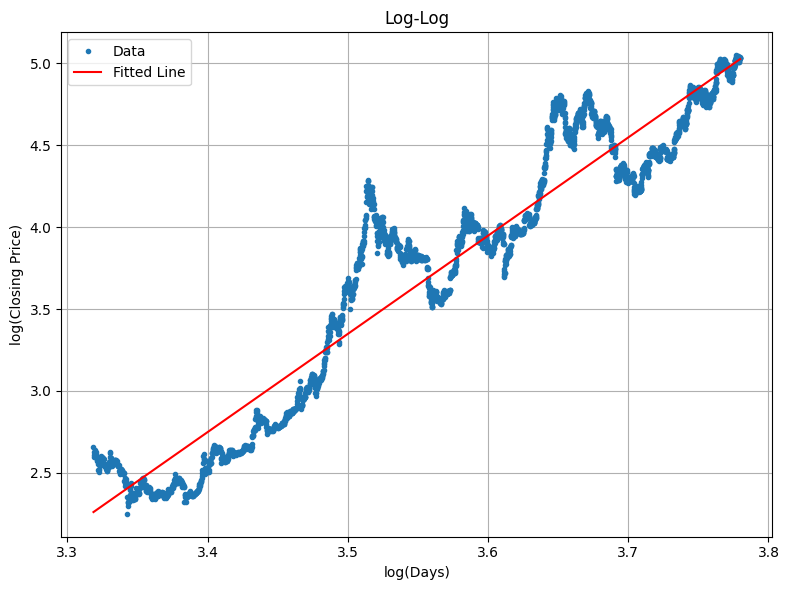

In [17]:
import matplotlib.pyplot as plt

# Predict values
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(dbtc['days_log'], dbtc['closing_price_log'], 'o', markersize=3, label='Data')
plt.plot(dbtc['days_log'], y_pred, 'r-', label='Fitted Line')
plt.xlabel('log(Days)')
plt.ylabel('log(Closing Price)')
plt.title('Log-Log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


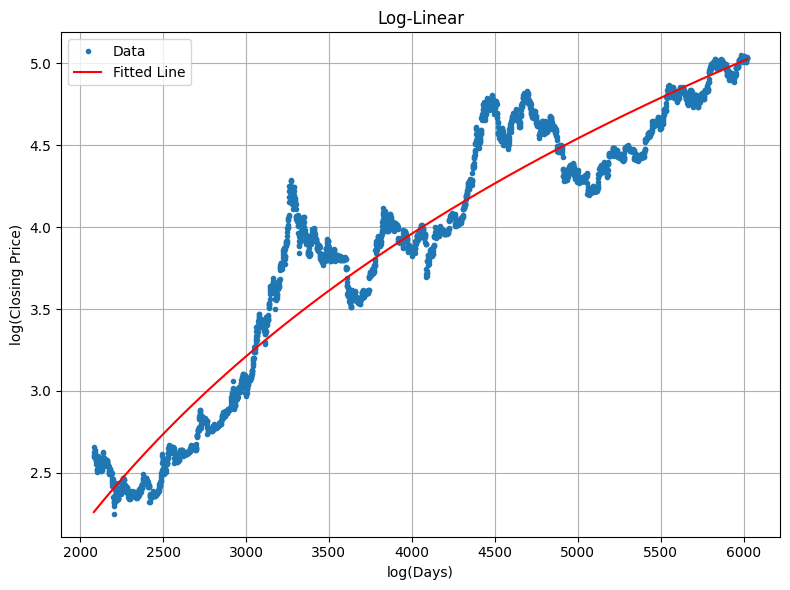

In [16]:
import matplotlib.pyplot as plt

# Predict values
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(dbtc['Days'], dbtc['closing_price_log'], 'o', markersize=3, label='Data')
plt.plot(dbtc['Days'], y_pred, 'r-', label='Fitted Line')
plt.xlabel('log(Days)')
plt.ylabel('log(Closing Price)')
plt.title('Log-Linear')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


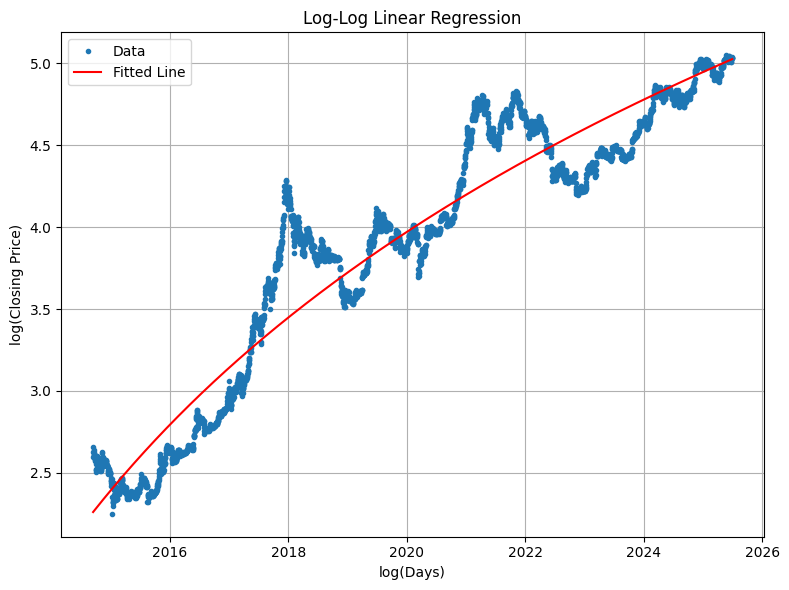

In [12]:
import matplotlib.pyplot as plt

# Predict values
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(dbtc.index, dbtc['closing_price_log'], 'o', markersize=3, label='Data')
plt.plot(dbtc.index, y_pred, 'r-', label='Fitted Line')
plt.xlabel('log(Days)')
plt.ylabel('log(Closing Price)')
plt.title('Log-Log Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


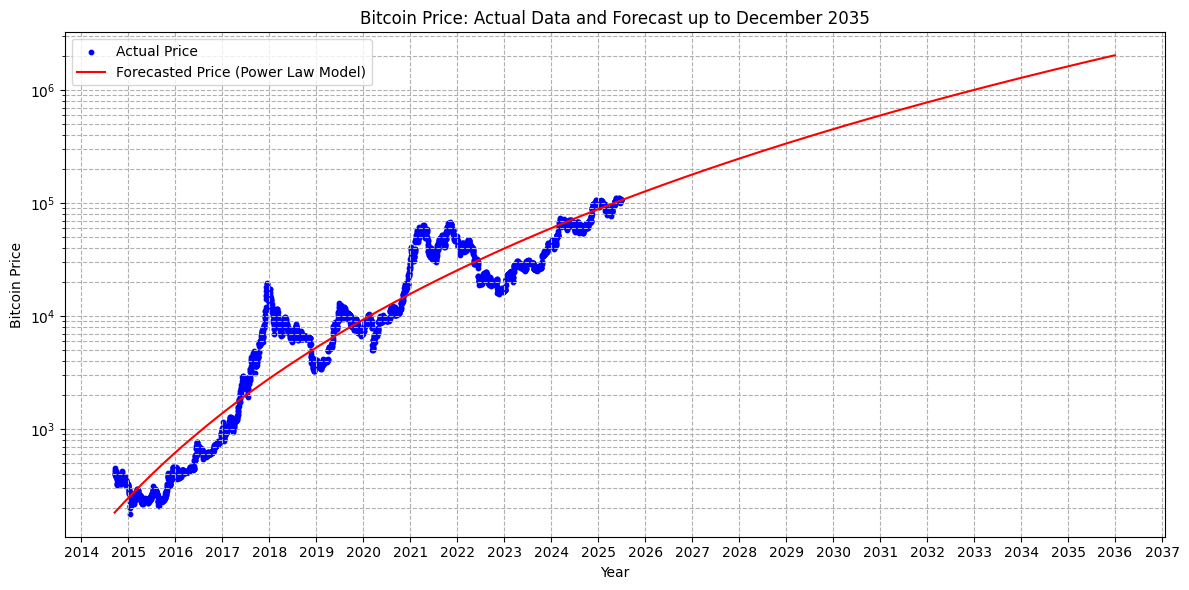

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
from datetime import datetime

# Replace with your actual data
# dbtc = pd.read_csv(...) or load your DataFrame appropriately

slope = 5.9932
intercept = -17.6282

start_date = pd.to_datetime('2014-09-17')
start_day = 2083 
end_date = pd.to_datetime('2035-12-31')

total_days = (end_date - start_date).days
forecast_days = np.arange(start_day, start_day + total_days + 1)

days_log = np.log10(forecast_days)
predicted_log_price = intercept + slope * days_log
predicted_price = 10**predicted_log_price

forecast_dates = [start_date + pd.Timedelta(days=int(d - start_day)) for d in forecast_days]

plt.figure(figsize=(12, 6))
plt.scatter(dbtc.index, dbtc['Close'], color='blue', s=10, label='Actual Price')
plt.plot(forecast_dates, predicted_price, color='red', label='Forecasted Price (Power Law Model)')

# Set 1-year interval on x-axis
plt.gca().xaxis.set_major_locator(YearLocator(1))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))

plt.xlabel('Year')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price: Actual Data and Forecast up to December 2035')
plt.yscale('log')  # log scale for better visualization
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()


In [14]:

def predict_bitcoin_price(target_date: str) -> float:
    """
    Predicts Bitcoin price on a given date using power-law model.

    Parameters:
        target_date (str): Date in 'YYYY-MM-DD' format.

    Returns:
        float: Predicted Bitcoin price.
    """
    # Model parameters
    slope = 5.9932
    intercept = -17.6282
    start_day = 2083
    start_date = pd.to_datetime("2014-09-17")

    # Convert target_date to datetime
    date = pd.to_datetime(target_date)

    # Calculate number of days since the reference day
    delta_days = (date - start_date).days + start_day

    if delta_days <= 0:
        raise ValueError("Date must be after 2014-09-17")

    # Apply power-law formula
    log_price = intercept + slope * np.log10(delta_days)
    price = 10**log_price
    return price


In [15]:
predict_bitcoin_price("2025-07-11")

np.float64(106977.47064060066)